In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from tqdm import tqdm

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
X.shape, y.shape

((150, 4), (150,))

In [4]:
objs = np.random.randint(0,150,size=7)

In [5]:
print(X[objs],'\n\n', y[objs].T)

[[6.9 3.1 5.1 2.3]
 [4.9 2.5 4.5 1.7]
 [4.7 3.2 1.3 0.2]
 [6.9 3.2 5.7 2.3]
 [6.3 2.8 5.1 1.5]
 [4.8 3.4 1.9 0.2]
 [6.6 3.  4.4 1.4]] 

 [2 2 0 2 2 0 1]


1. Model drzewa jest nieograniczony
2. sprawdzamy wpływ ilości danych uczących na predykcję

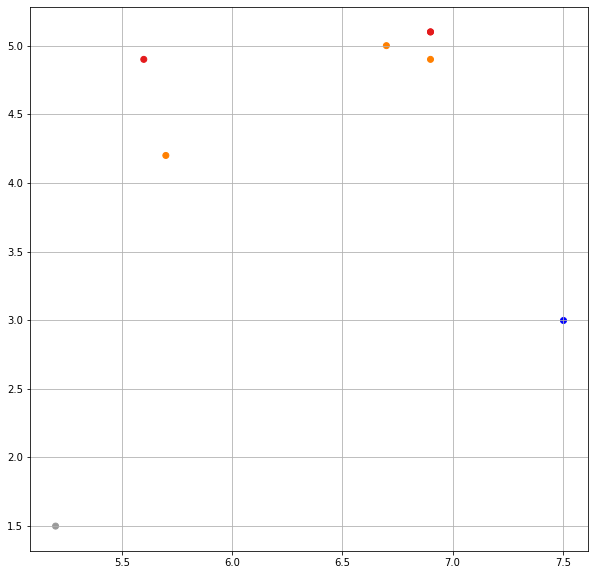

In [6]:
X = iris.data[:,(0,2)]
objs = np.random.randint(0,150,size=7)
X_1 = X[objs]
y_1 = y[objs]

plt.figure(figsize=(10,10), facecolor='white')
plt.scatter(X_1[:,0], 
            X_1[:,1],
            c=y_1,
            cmap=plt.cm.Set1_r);

plt.grid();

xx = [7.5,3]
plt.scatter(xx[0],
            xx[1], 
            color='blue');

In [7]:
model = DecisionTreeClassifier()
model.fit(X_1,y_1)

setosa = 0
versicolor = 0
virginica = 0
y_predict = model.predict([xx])

if y_predict[0] == 0:
  setosa += 1 
elif y_predict[0] == 1:
  versicolor += 1
elif y_predict[0] == 2:
  virginica +=  1
[setosa, versicolor, virginica]


[0, 1, 0]

In [8]:
##### xx = [7.5, 3]

max_trn_size = 150
simulation_counts = 1000
max_depth = 3

scores = np.zeros((3, max_trn_size))

for size in tqdm(range(1, max_trn_size + 1)):
  setosa = 0
  versicolor = 0
  virginica = 0
  for i in range(simulation_counts):
    objs = np.random.randint(0,150,size=size)
    X_1 = X[objs]
    y_1 = y[objs]
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_1,y_1)
    y_predict = model.predict([xx])

    if y_predict[0] == 0:
      setosa += 1 
    elif y_predict[0] == 1:
      versicolor += 1
    elif y_predict[0] == 2:
      virginica +=  1

  scores[0][size-1] = setosa / simulation_counts * 100  
  scores[1][size-1] = versicolor / simulation_counts * 100
  scores[2][size-1] = virginica / simulation_counts * 100
 # print("size={} setosa {:.2f}%, versicolor {:.2f}%, virginica {:.2f}%".format(size,score[0], score[1], score[2]))

100%|█████████████████████████████████████████| 150/150 [00:48<00:00,  3.11it/s]


### Wizualizacja

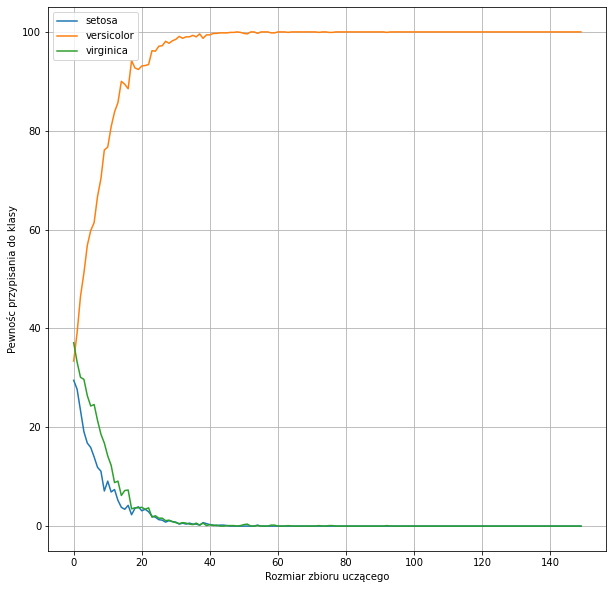

In [9]:
plt.figure(figsize=(10,10), facecolor='white')
plt.plot(scores[0], label='setosa')
plt.plot(scores[1], label='versicolor')
plt.plot(scores[2], label='virginica')

plt.grid()
plt.xlabel("Rozmiar zbioru uczącego")
plt.ylabel("Pewnośc przypisania do klasy")
plt.legend()
plt.show()